### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
#what types of data.
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
# Remove duplicates, if any.
print("Before removing duplicates:", data.shape)

data = data.drop_duplicates()
print("After removing duplicates:", data.shape)

# 74 duplicate records removed

Before removing duplicates: (12684, 26)
After removing duplicates: (12610, 26)


In [6]:
#Check for Missing Values

missing_counts = data.isnull().sum().sort_values()
print(missing_counts)

destination                 0
direction_same              0
toCoupon_GEQ25min           0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
income                      0
direction_opp               0
education                   0
has_children                0
occupation                  0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
temperature                 0
weather                     0
passanger                   0
maritalStatus               0
Y                           0
Bar                       107
RestaurantLessThan20      129
CarryAway                 150
Restaurant20To50          189
CoffeeHouse               217
car                     12502
dtype: int64


In [7]:
# What are the kinds of data in each column.
for col in data.columns:
    print(data[col].value_counts())
    print("")

destination
No Urgent Place    6266
Home               3230
Work               3114
Name: count, dtype: int64

passanger
Alone        7248
Friend(s)    3292
Partner      1069
Kid(s)       1001
Name: count, dtype: int64

weather
Sunny    10011
Snowy     1397
Rainy     1202
Name: count, dtype: int64

temperature
80    6475
55    3830
30    2305
Name: count, dtype: int64

time
6PM     3220
7AM     3114
10AM    2271
2PM     2006
10PM    1999
Name: count, dtype: int64

coupon
Coffee House             3989
Restaurant(<20)          2779
Carry out & Take away    2344
Bar                      2010
Restaurant(20-50)        1488
Name: count, dtype: int64

expiration
1d    7031
2h    5579
Name: count, dtype: int64

gender
Female    6469
Male      6141
Name: count, dtype: int64

age
21         2642
26         2548
31         2019
50plus     1781
36         1317
41         1089
46          670
below21     544
Name: count, dtype: int64

maritalStatus
Married partner      5068
Single               471

3. Decide what to do about your missing data -- drop, replace, other...

In [8]:
## Fix Data

## Passenger Column
# rename the passanger column to correct spelling 'passenger'
data = data.rename(columns={'passanger':'passenger'})

## 'Car' Column
## Remove bad 'car' data - these are not valid cars, motorcycle, do not drive, no onstar (for tracking)

#do not drive
print(data.shape)
if 'car' in data.columns: # avoid errors if run multiple times as 'car' column has been removed, below
    data = data[data['car']!='do not drive']
    print(data.shape)
    # 22 rows removed

#Car that is too old to install Onstar :D
print(data.shape)
if 'car' in data.columns:
    data = data[data['car']!='Car that is too old to install Onstar :D']
    print(data.shape)
    # 21 rows removed

#Scooter and motorcycle
print(data.shape)
if 'car' in data.columns:
    data = data[data['car']!='Scooter and motorcycle']
    print(data.shape)
    # 22 rows removed

# 'car' column is irrelevant. Will not be used in comparisons. drop it.
if 'car' in data.columns:
    data = data.drop(columns=['car'])

## 'time' Column --> remove bad time of day rows, Only 10AM, 2PM, and 6PM Specified in above specification
data = data.query("time == '10AM' or time == '2PM' or time == '6PM'")
print (data.shape)
# 5,087 rows removed

## Columns - Bar, RestaurantLessThan20, CarryAway, Restaurant20To50, CoffeeHouse
# if there is no venue the customer has used, drop the rows. Ambigious data.
data = data.query('Bar.notna() or RestaurantLessThan20.notna() or CarryAway.notna() or Restaurant20To50.notna() or CoffeeHouse.notna() ')
print(data.shape)
# 42 rows removed

## All Columns - drop all "Null" Value Rows
data = data.dropna()
# 792 rows removed

## 'Y' Column -> 'Yes' Column transform 
# Create a new 'Yes' Column with integer values, for use in median calculations
data["Yes"] = data["Y"].transform(lambda x: 'Yes' if x == 1 else 'No')

## 'age' Column -> 'age_range' Column transform
# more readable age range column (categorical)
age_mapping = {
    'below21': '<21',
    '50plus': '>50',
    '21': '21-25',
    '26': '26-30',
    '31': '31-35',
    '36': '36-40',
    '41': '41-45',
    '46': '46-50'
}

data["age_range"] = data["age"].map(age_mapping).fillna('Unknown')

# 'age' Column transform to int type
data["age"] = data["age"].transform(lambda x: 20 if x == 'below21' else x)
data["age"] = data["age"].transform(lambda x: 50 if x == '50plus' else x)

data['age'] = data['age'].astype(int)

## 'Bar' Column -> new columns and transforms
data["bar_never"] = data["Bar"].transform(lambda x: 1 if x == 'never' or x == 'less1' else 0)
data["bar_1_to_3trips"] = data["Bar"].transform(lambda x: 1 if x == '1~3' else 0)
data["bar_4_to_8trips"] = data["Bar"].transform(lambda x: 1 if x == '4~8' else 0)
data["bar_gt8trips"] = data["Bar"].transform(lambda x: 1 if x == 'gt8' else 0)
data["bar_at_least_onetrip"] = data["Bar"].transform(lambda x: 1 if x != 'never' and x != 'less1' else 0)
data["bar_less_than_4trips"] = data["Bar"].transform(lambda x: 1 if x != '4~8' and x != 'gt8' else 0)
data["bar_4or_more_trips"] = data["Bar"].transform(lambda x: 1 if x == '4~8' or x == 'gt8' else 0)

## Verification of above Data Manipulation 
# Missing Counts - Print 
missing_counts = data.isnull().sum().sort_values()
print(missing_counts) 

(12610, 26)
(12588, 26)
(12588, 26)
(12567, 26)
(12567, 26)
(12545, 26)
(7458, 25)
(7416, 25)
destination             0
bar_at_least_onetrip    0
bar_gt8trips            0
bar_4_to_8trips         0
bar_1_to_3trips         0
bar_never               0
age_range               0
Yes                     0
Y                       0
direction_opp           0
direction_same          0
toCoupon_GEQ25min       0
toCoupon_GEQ15min       0
toCoupon_GEQ5min        0
Restaurant20To50        0
RestaurantLessThan20    0
CarryAway               0
CoffeeHouse             0
passenger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
bar_less_than_4trips    0
gender                  0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
age                     0
bar_4or_more_trips      0
dtype: int64


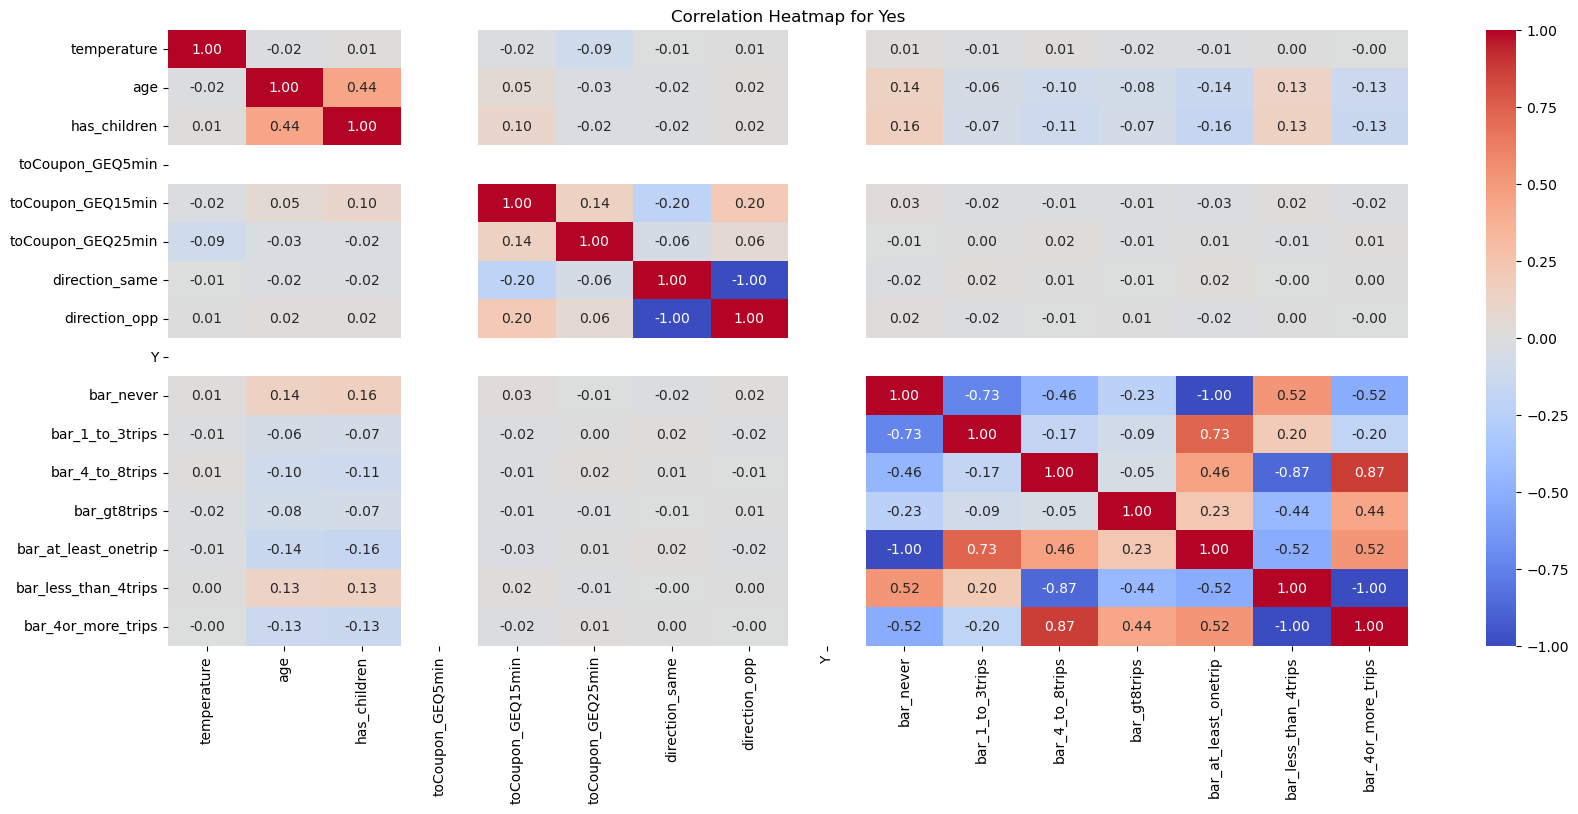

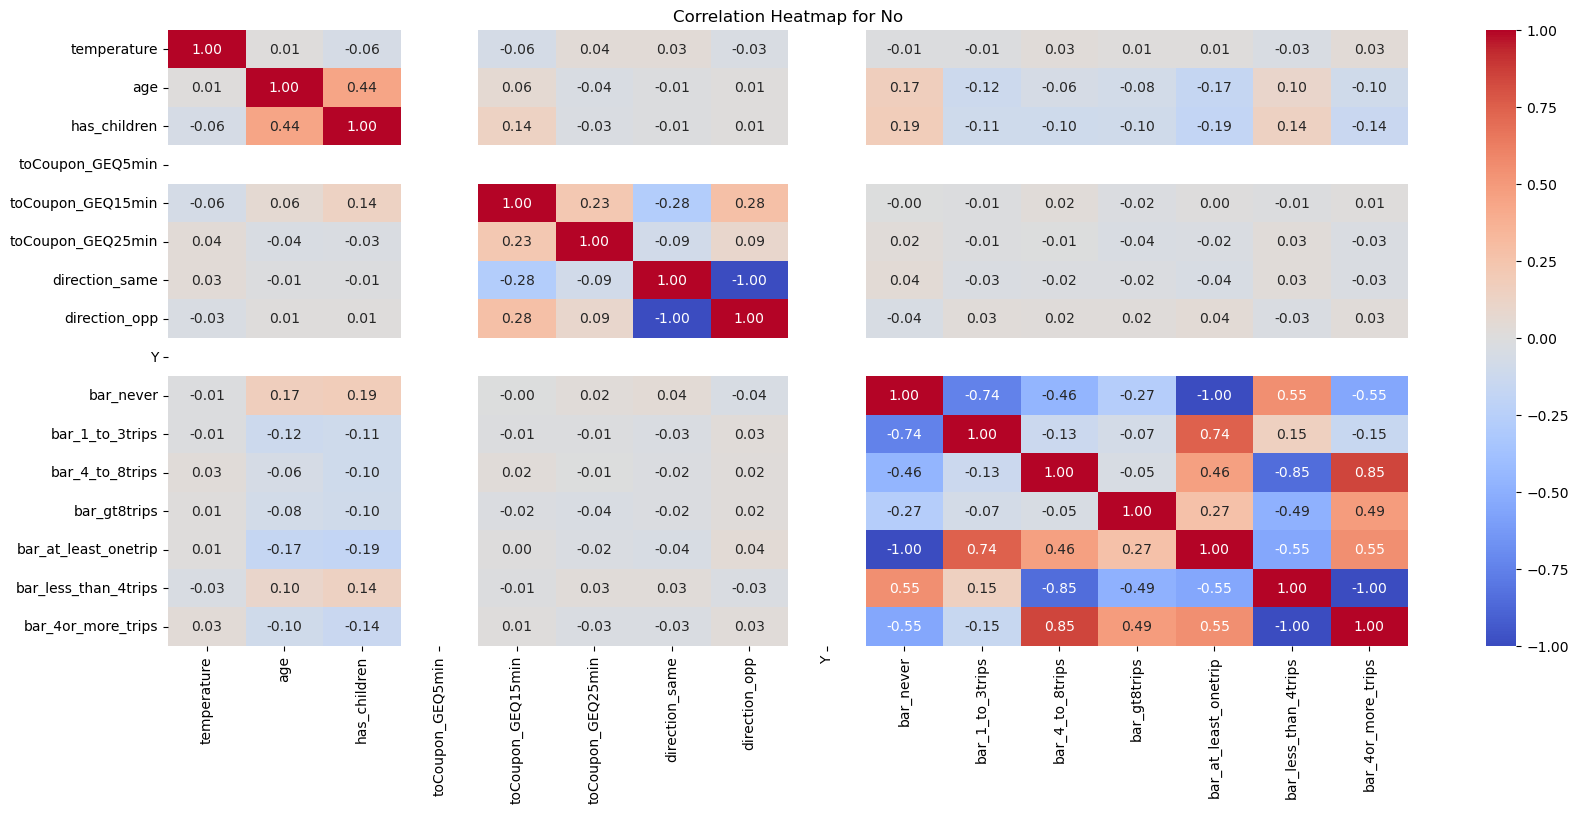

In [9]:
## Initial Heatmap to See Correlations

# --> observations. YES   0.15... has children, never goes to bar
# 15 min coupon, opposite direction 0.20

# --> observations. NO  0.27... 
# 15 min coupon, opposite direction 
# 0.18 has children, No bar

yes_no_coupon = data['Yes'].unique()

# Loop through each class to plot a heatmap of correlation matrix
for answer in yes_no_coupon:
    # Filter the DataFrame for the current class
    subset_df = data[data['Yes'] == answer]
    numerical_subset_df = subset_df.select_dtypes(include=['int64', 'float64'])
    corr = numerical_subset_df.corr()

    plt.figure(figsize=(20, 8))  # Adjust the size as needed
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Heatmap for {answer}')
    plt.show()

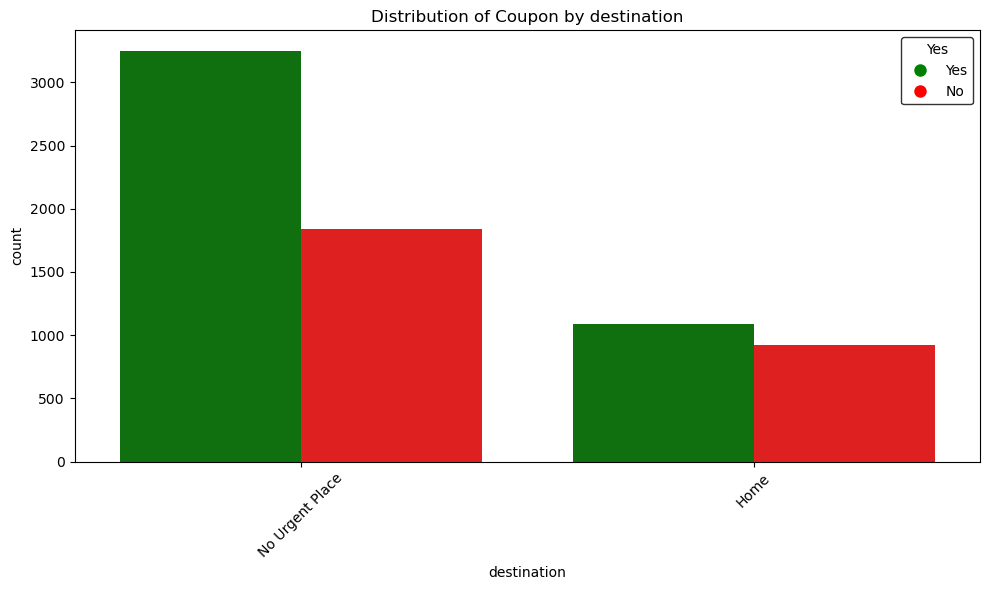

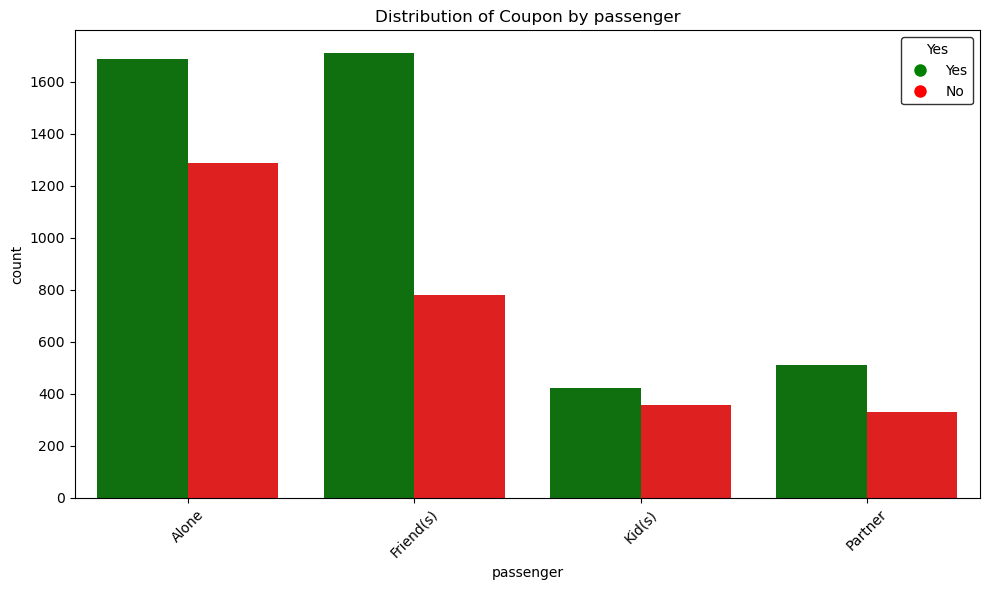

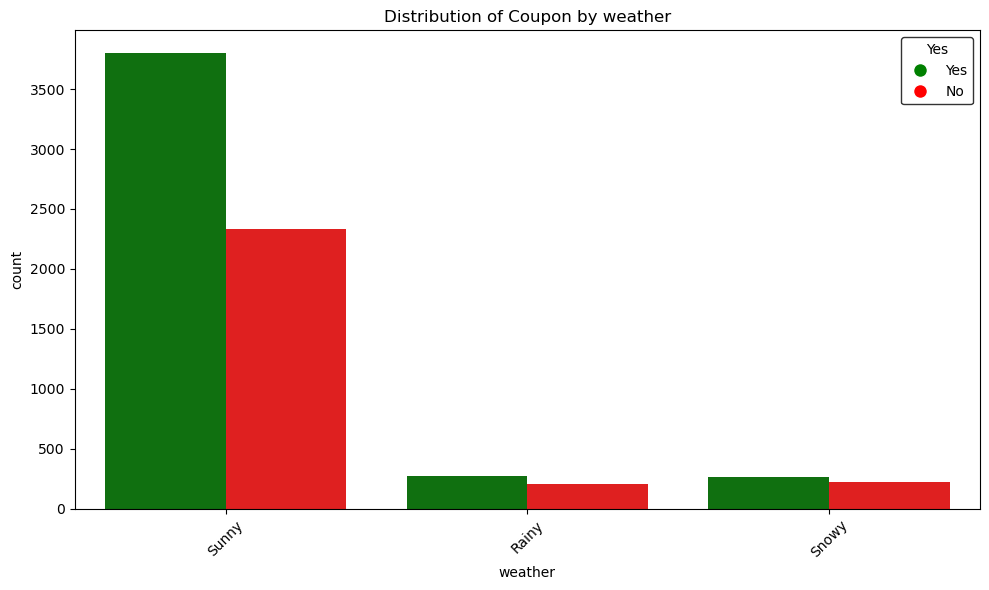

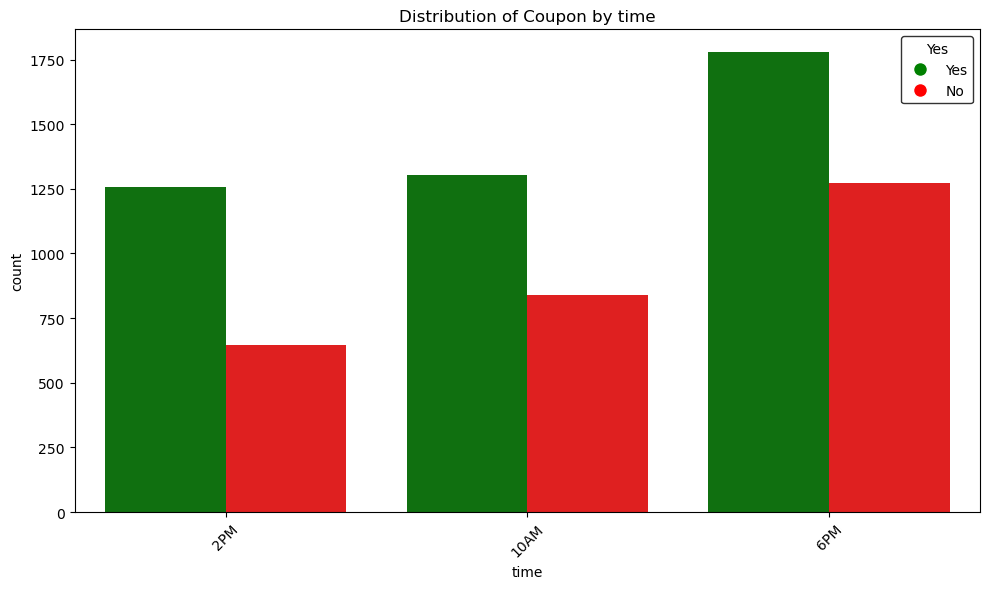

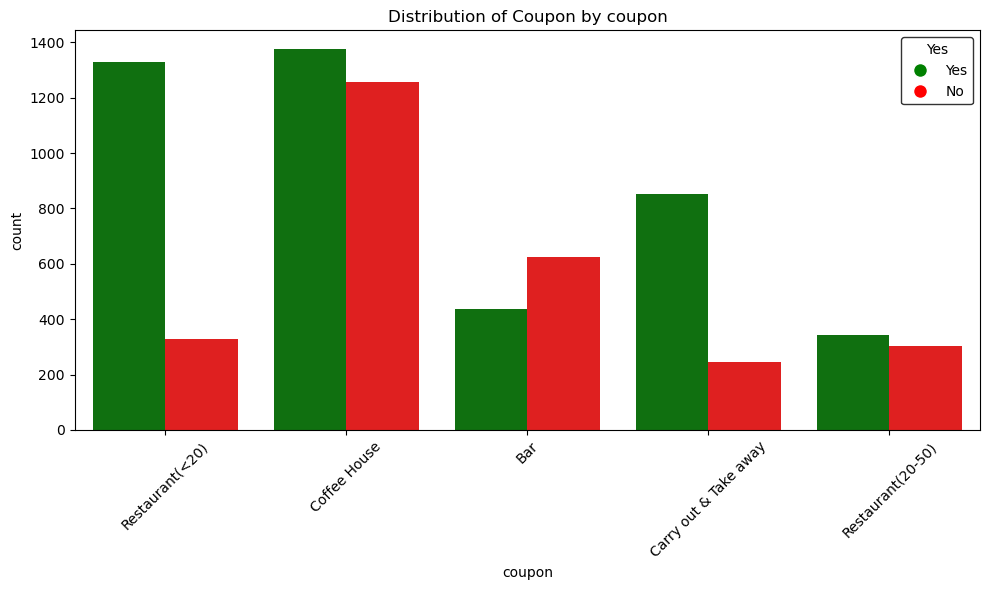

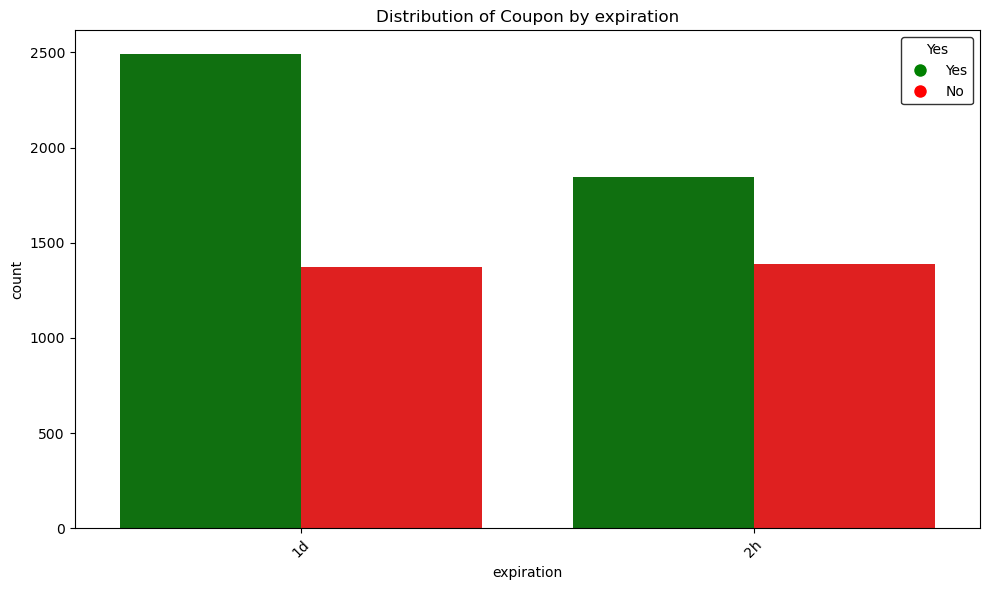

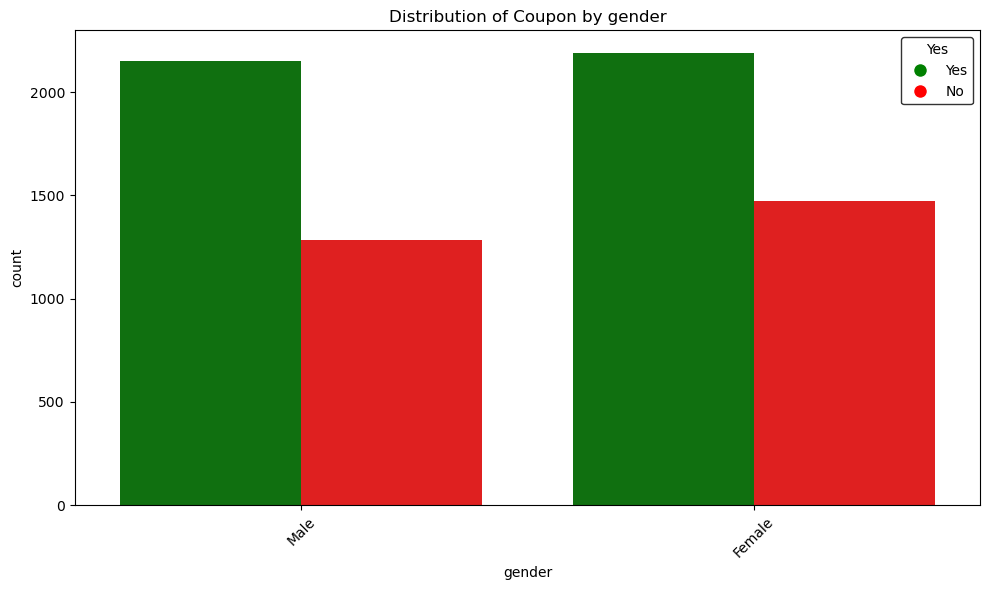

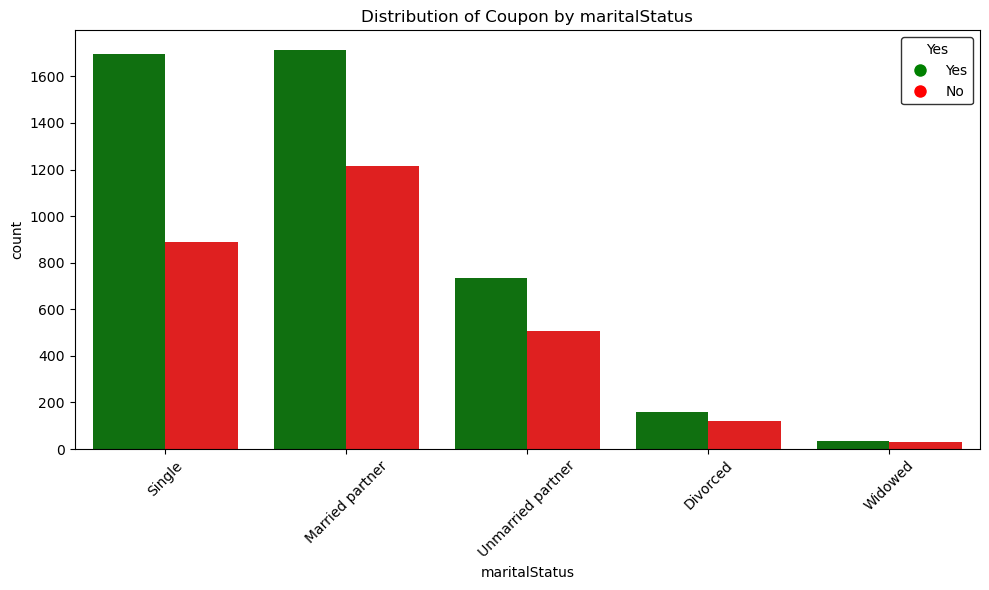

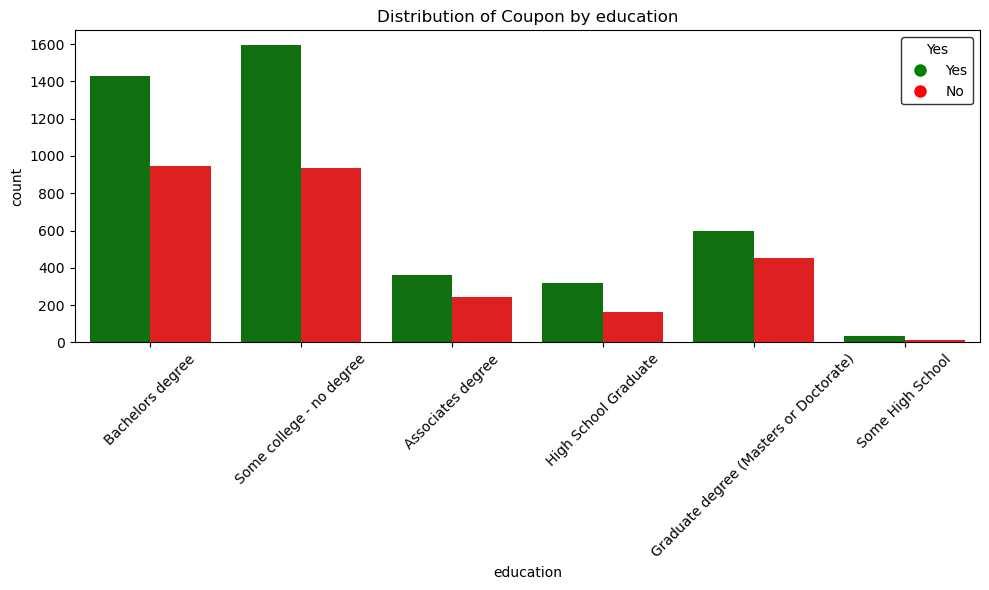

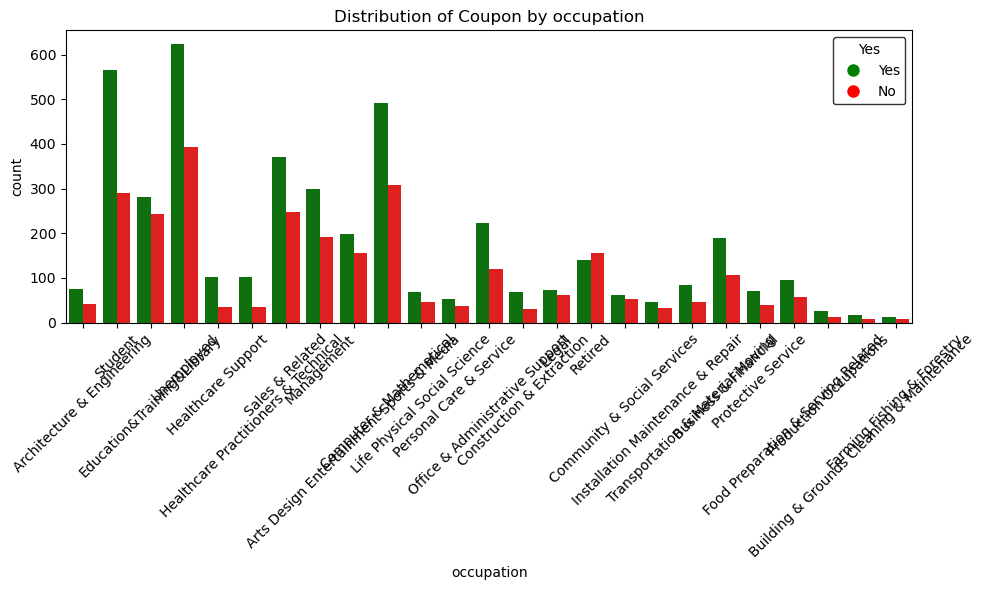

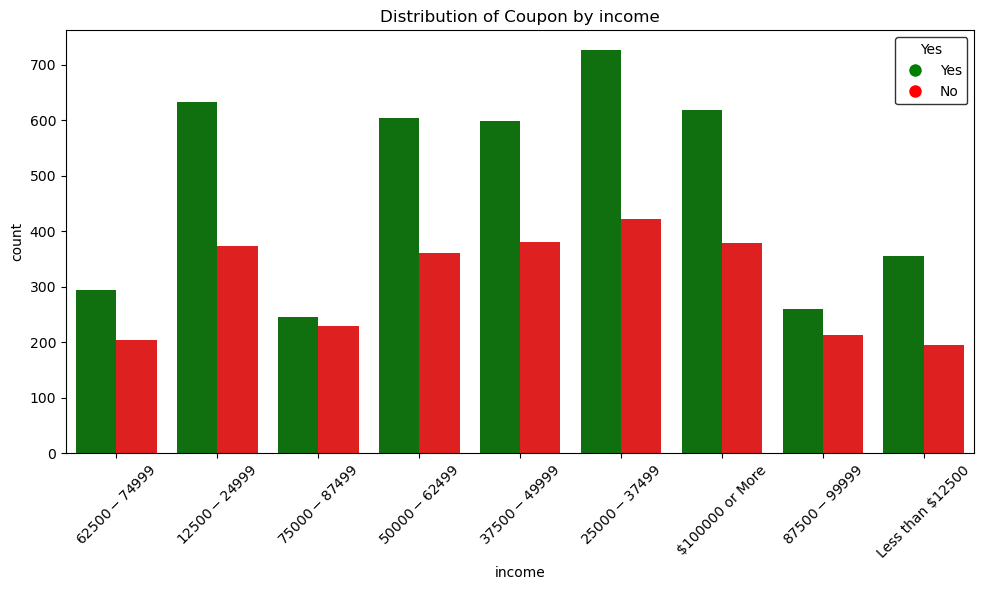

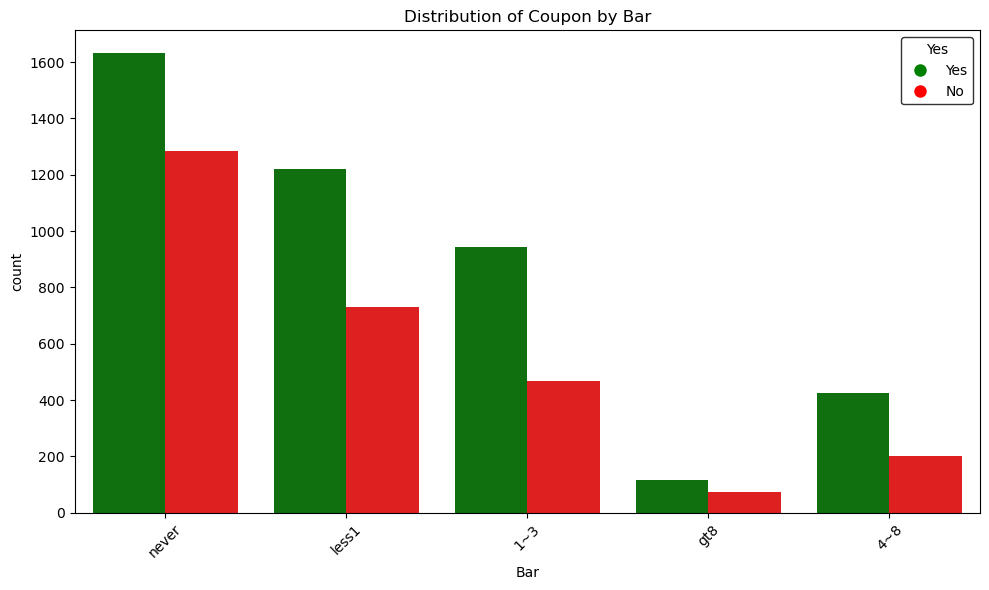

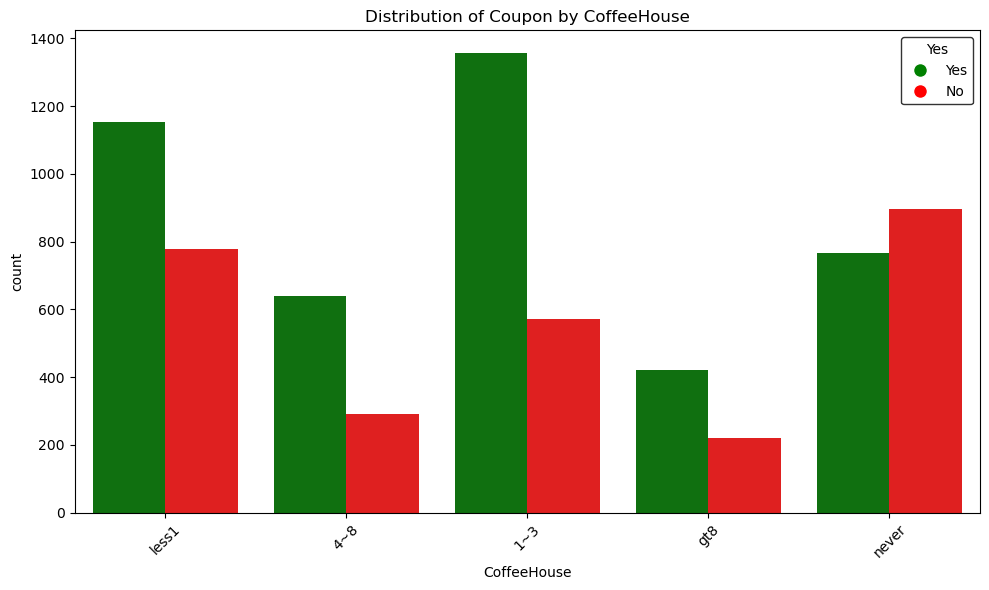

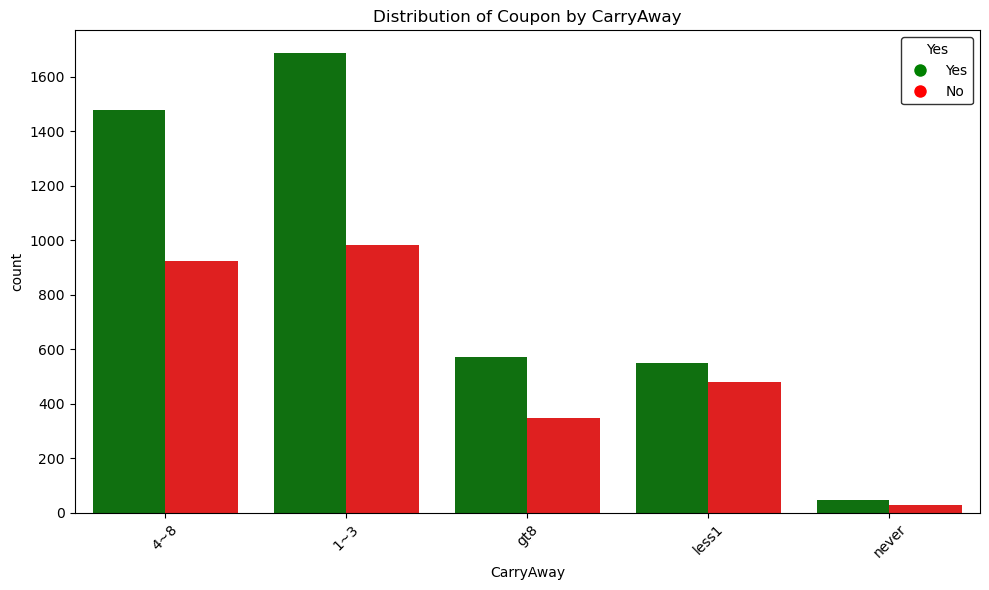

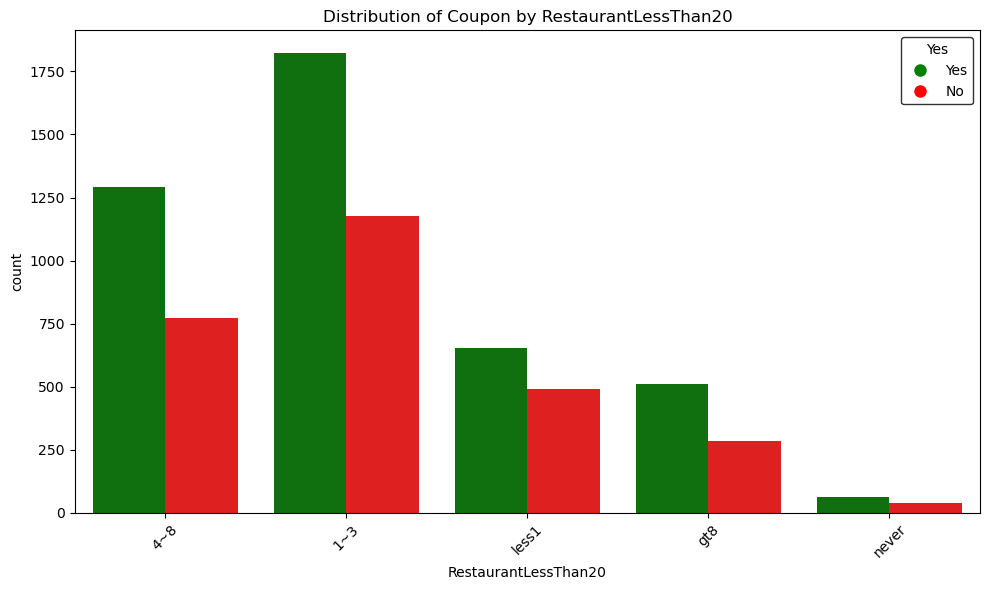

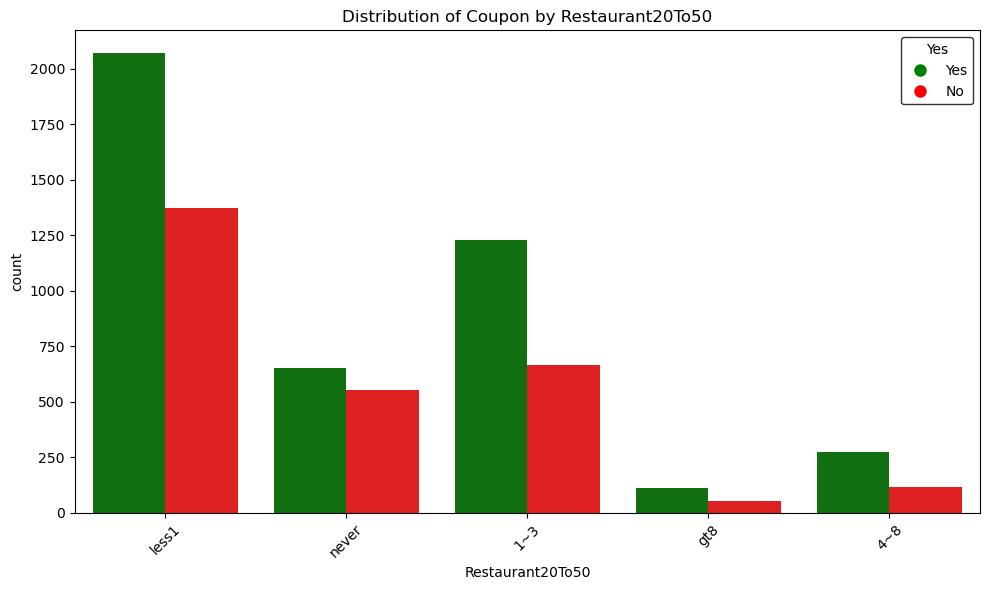

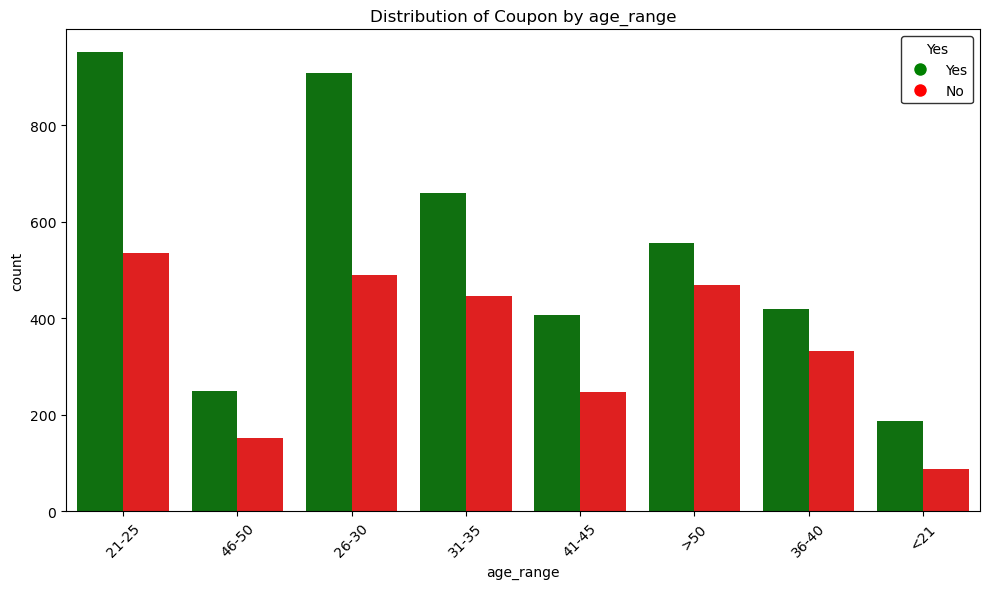

In [10]:
## Initial Categorical Features, to see Distributions

categorical_columns = data.select_dtypes(include=['object', 'category']).columns  # Adjust as necessary

for col in categorical_columns:
    if col != 'Yes':  # Assuming 'Yes' Column, is also a categorical column
        plt.figure(figsize=(10, 6))

        # Define custom colors for bars and legend
        custom_palette = {'Yes': 'green', 'No': 'red'}
        
        sns.countplot(x=col, hue='Yes', data=data, palette=custom_palette)
        plt.title(f'Distribution of Coupon by {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()

        # Get handles and labels from the current legend
        handles, labels = plt.gca().get_legend_handles_labels()
        
        # Replace legend with custom colors and labels
        plt.legend(
            handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=custom_palette[label], markersize=10) for label in labels],
            labels=labels,
            title="Yes",
            loc="upper right",
            frameon=True,
            facecolor="white",
            edgecolor="black"
        )     

        # Display Plot
        plt.show()


4. What proportion of the total observations chose to accept the coupon?



In [11]:
print(round((len (data.query("Y == 1"))/len (data) ) * 100, 2),"% chose to accept the coupon")

61.12 % chose to accept the coupon


5. Use a bar plot to visualize the `coupon` column.

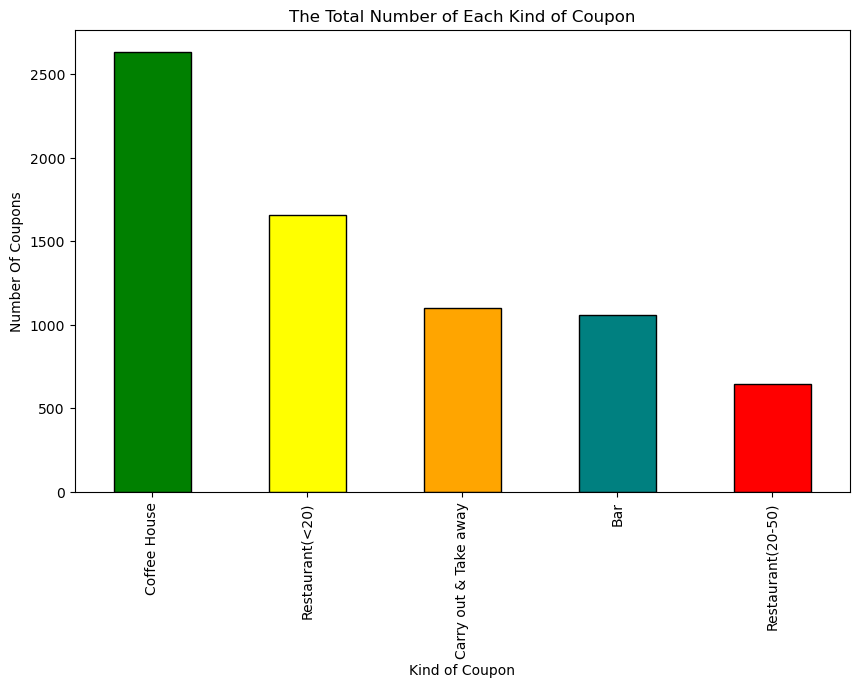

In [12]:
# Get the coupon category counts
category_counts = data['coupon'].value_counts()

bar_colors = ['green', 'yellow', 'orange', 'teal', 'red']

# Create the bar plot
category_counts.plot(kind='bar', figsize=(10, 6), color=bar_colors, edgecolor='black')

# Add labels and title
plt.xlabel('Kind of Coupon')
plt.ylabel('Number Of Coupons')
plt.title('The Total Number of Each Kind of Coupon')

# Display the plot
plt.show()

6. Use a histogram to visualize the temperature column.

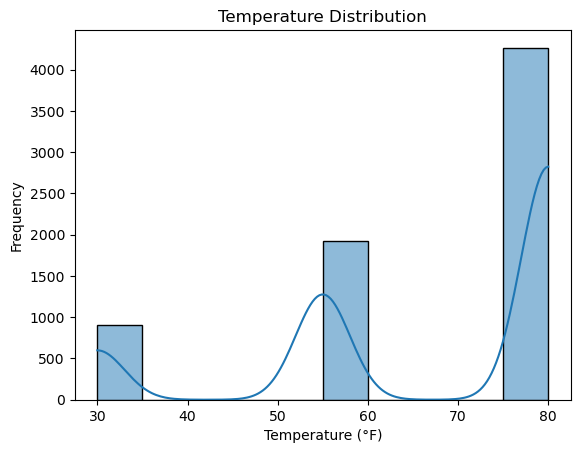

In [13]:
# Plot the histogram
sns.histplot(data, x='temperature', bins=10, kde=True)  # kde=True adds a kernel density estimate

# Add labels and title
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')

# Show plot
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [14]:
bar_dataframe = data.query("coupon == 'Bar'")
bar_dataframe = bar_dataframe.copy()

2. What proportion of bar coupons were accepted?


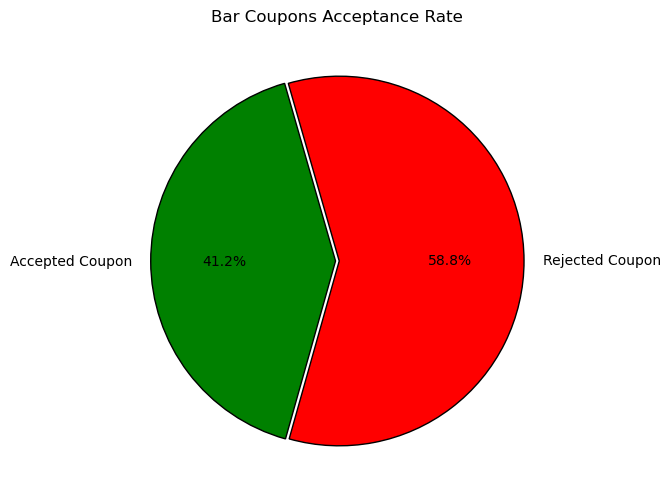

In [15]:
accepted_coupon_pct = round((len (bar_dataframe.query("Y == 1"))/len (bar_dataframe) ) * 100, 2) 
rejected_coupon_pct = 100 - accepted_coupon_pct

labels = ['Accepted Coupon', 'Rejected Coupon'] # Labels
sizes = [accepted_coupon_pct, rejected_coupon_pct]  # Percentages or counts
colors = ["green", "red"] # Pie Chart Colors

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',  # Display percentages
    startangle=106,     # Rotate the chart for better readability
    wedgeprops={'edgecolor': 'black'},  # Add black edges for better visibility
    explode=[0.01,0.01]
)

plt.title('Bar Coupons Acceptance Rate')
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


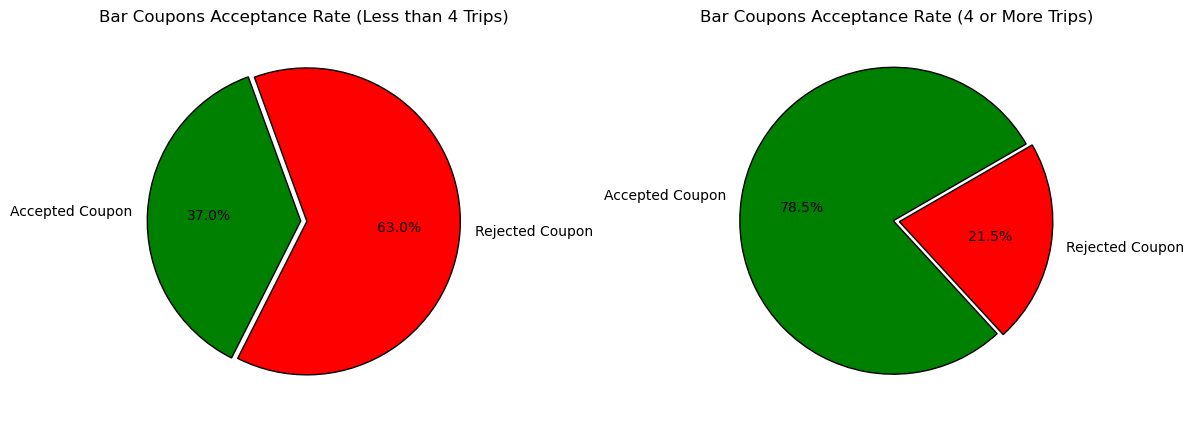

In [16]:
# bar count Column - less than 4 trips OR 4 or more trips
# Create a mask for rows that match the criteria
mask = (bar_dataframe["bar_less_than_4trips"] == 1) | (bar_dataframe["bar_4or_more_trips"] == 1)

# Assign values based on the 'bar_4or_more_trips' column
bar_dataframe.loc[mask, "bar_count"] = bar_dataframe.loc[mask, "bar_4or_more_trips"].apply(
    lambda x: 'more than 4 trips' if x == 1 else 'less than 4 trips'
)

# Each Bar Times Type, Total Record Count
len_barLess = len(bar_dataframe.query("bar_count == 'less than 4 trips'"))
len_barMore = len(bar_dataframe) - len_barLess

# accepted/reject percentage for bar, 3 or fewer times per month
accepted_coupon_pct = round((len (bar_dataframe.query("bar_count == 'less than 4 trips' and Y == 1"))/len_barLess ) * 100, 2) 
rejected_coupon_pct = 100 - accepted_coupon_pct

labels = ['Accepted Coupon', 'Rejected Coupon']
sizes = [accepted_coupon_pct, rejected_coupon_pct]  # Percentages or counts
colors = ["green", "red"] # pie slice colors

# Create a pie chart - Pct for Less than 4 Trips
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',  # Display percentages
    startangle=110,     # Rotate the chart for better readability
    wedgeprops={'edgecolor': 'black'},  # Add black edges for better visibility
    explode=[0.02,0.02]
)

axes[0].set_title('Bar Coupons Acceptance Rate (Less than 4 Trips)')

# Percentages for More than 4 Trips
more_accepted_coupon_pct = round((len (bar_dataframe.query("bar_count != 'less than 4 trips' and Y == 1"))/len_barMore) * 100, 2) 
more_rejected_coupon_pct = 100 - more_accepted_coupon_pct
sizes = [more_accepted_coupon_pct, more_rejected_coupon_pct]  # Percentages or counts

# Create a pie chart - Pct for More than 4 Trips
axes[1].pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',  # Display percentages
    startangle=30,     # Rotate the chart for better readability
    wedgeprops={'edgecolor': 'black'},  # Add black edges for better visibility
    explode=[0.02,0.02]
)

axes[1].set_title('Bar Coupons Acceptance Rate (4 or More Trips)')

plt.tight_layout()
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


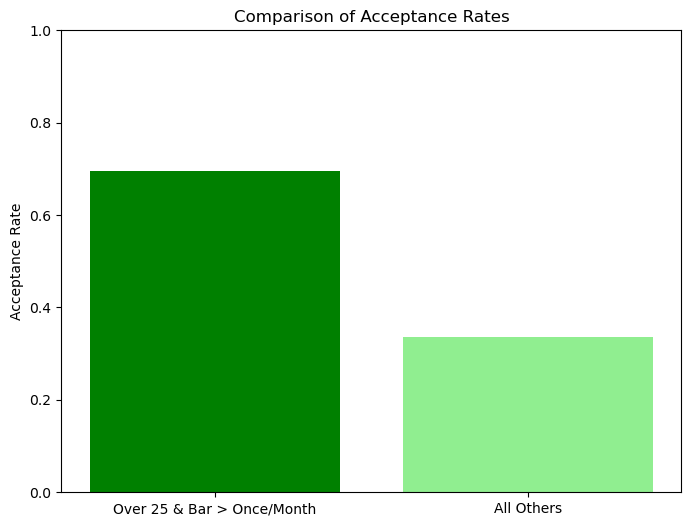

In [17]:
# Group 1: Drivers who go to a bar more than once a month and are over age 25
age_25 = bar_dataframe[(bar_dataframe['age'] != 21) & (bar_dataframe['age'] != 20) & (bar_dataframe['Bar'] != 'never') & (bar_dataframe['Bar'] != 'less1')]

# Group 2: All others
all_others = bar_dataframe[~((bar_dataframe['age'] != 21) & (bar_dataframe['age'] != 20) & (bar_dataframe['Bar'] != 'never') & (bar_dataframe['Bar'] != 'less1'))]

# Calculate acceptance rates
acceptance_rate_group1 = age_25['Y'].mean()  # Mean of the Accepted column
acceptance_rate_group2 = all_others['Y'].mean()

# Create a DataFrame for the bar chart
comparison_df = pd.DataFrame({
    'Group': ['Over 25 & Bar > Once/Month', 'All Others'],
    'Acceptance Rate': [acceptance_rate_group1, acceptance_rate_group2]
})

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(comparison_df['Group'], comparison_df['Acceptance Rate'], color=['g','lightgreen'])
plt.title('Comparison of Acceptance Rates')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)  # Acceptance rate is between 0 and 1
plt.xticks(rotation=0)
plt.show()

## As seen here, Drivers who go to a bar more than once a month and are over the age of 25, 
## accept the offer ~70% of the time. Versus ~30% of the time for all others. 

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


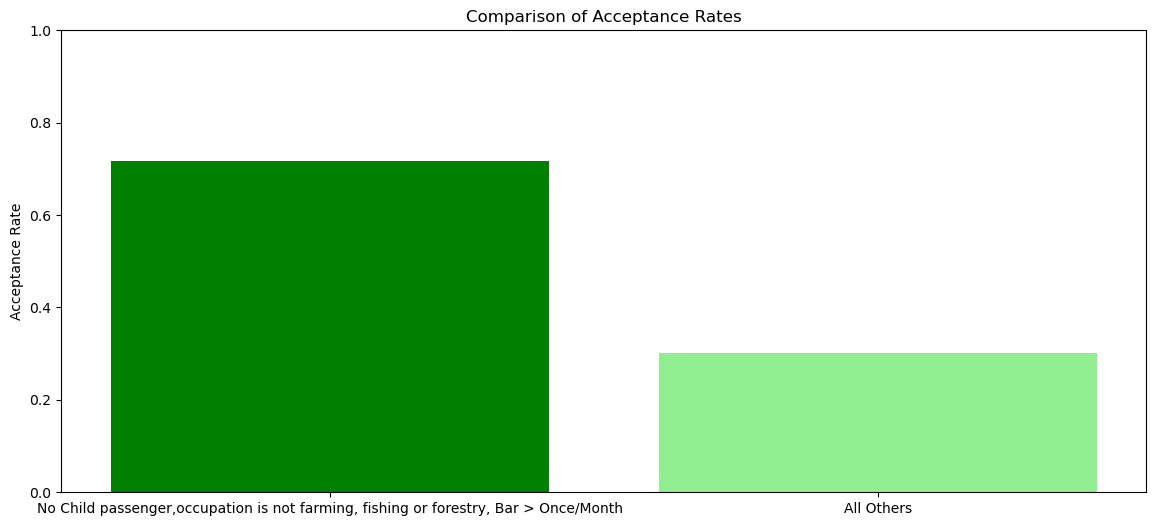

In [18]:
# Group 1: Drivers who go to a bar more than once a month and had passengers that were not a kid, occupations other than farming, fishing or forestry
others_more_than_once_a_month = bar_dataframe[(bar_dataframe['passenger'] != 'Kid(s)') & (bar_dataframe['occupation'] != 'Farming Fishing & Forestry') & (bar_dataframe['Bar'] != 'never') & (bar_dataframe['Bar'] != 'less1')]

# Group 2: All others
all_others_exclude_above = bar_dataframe[~((bar_dataframe['passenger'] != 'Kid(s)') & (bar_dataframe['occupation'] != 'Farming Fishing & Forestry') & (bar_dataframe['Bar'] != 'never') & (bar_dataframe['Bar'] != 'less1'))]

# Calculate acceptance rates
acceptance_rate_group1 = others_more_than_once_a_month['Y'].mean()  # Mean of the Accepted column
acceptance_rate_group2 = all_others_exclude_above['Y'].mean()

# Create a DataFrame for the bar chart
comparison_df = pd.DataFrame({
    'Group': ['No Child passenger,occupation is not farming, fishing or forestry, Bar > Once/Month', 'All Others'],
    'Acceptance Rate': [acceptance_rate_group1, acceptance_rate_group2]
})

# Plot the bar chart
plt.figure(figsize=(14, 6))
plt.bar(comparison_df['Group'], comparison_df['Acceptance Rate'], color=['g','lightgreen'])
plt.title('Comparison of Acceptance Rates')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)  # Acceptance rate is between 0 and 1
plt.xticks(rotation=0)
plt.show()

## As seen here, Drivers who go to a bar more than once a month without a Child passenger and occupation is not farming, fishing or forestry 
## accept the offer, over ~70% of the time. Versus ~30% of the time for all others. 

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



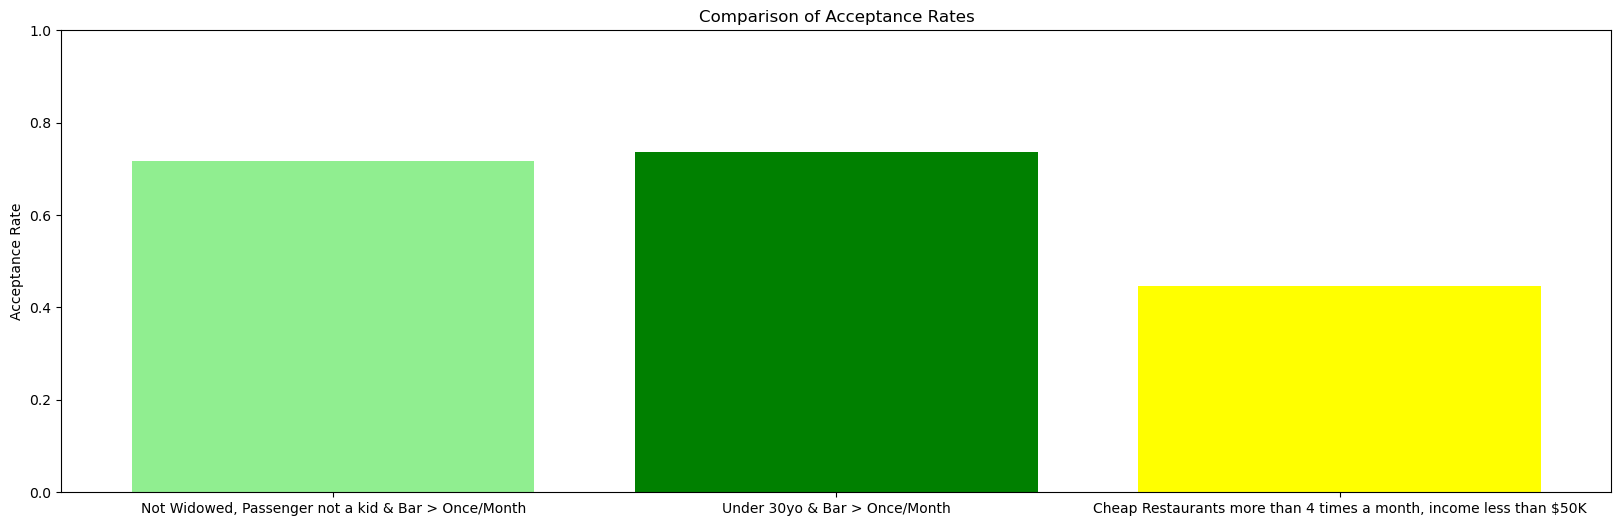

In [19]:
# Group 1: Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed
not_widowed_more_than_once_a_month = bar_dataframe[(bar_dataframe['passenger'] != 'Kid(s)') & (bar_dataframe['maritalStatus'] != 'Widowed') & (bar_dataframe['Bar'] != 'never') & (bar_dataframe['Bar'] != 'less1')]

# Group 2: Drivers who go to bars more than once a month and are under the age of 30
under_30_than_once_a_month = bar_dataframe[(((bar_dataframe['age'] == 21) | (bar_dataframe['age'] == 26) | (bar_dataframe['age'] == 20))  & (bar_dataframe['Bar'] != 'never') & (bar_dataframe['Bar'] != 'less1'))]

# Group 3: Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K
cheap_restaurants_income_less_than_50K = bar_dataframe[((bar_dataframe['RestaurantLessThan20'] == '4~8') |  (bar_dataframe['RestaurantLessThan20'] == 'gt8')) & ((bar_dataframe['income'] == '$25000 - $37499') | (bar_dataframe['income'] == '$12500 - $24999') | (bar_dataframe['income'] == '$37500 - $49999') | (bar_dataframe['income'] == 'Less than $12500'))]

# Calculate acceptance rates
acceptance_rate_group1 = not_widowed_more_than_once_a_month['Y'].mean()  # Mean of the Accepted column
acceptance_rate_group2 = under_30_than_once_a_month['Y'].mean()
acceptance_rate_group3 = cheap_restaurants_income_less_than_50K['Y'].mean()

# Create a DataFrame for the bar chart
comparison_df = pd.DataFrame({
    'Group': ['Not Widowed, Passenger not a kid & Bar > Once/Month', 'Under 30yo & Bar > Once/Month', 'Cheap Restaurants more than 4 times a month, income less than $50K'],
    'Acceptance Rate': [acceptance_rate_group1, acceptance_rate_group2, acceptance_rate_group3]
})

# Plot the bar chart
plt.figure(figsize=(20, 6))
plt.bar(comparison_df['Group'], comparison_df['Acceptance Rate'], color=['lightgreen','green','yellow'])
plt.title('Comparison of Acceptance Rates')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)  # Acceptance rate is between 0 and 1
plt.xticks(rotation=0)
plt.show()

# As seen here.  
# Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed. Have an over 70% Acceptance rate.
#
# Drivers who go to bars more than once a month and are under the age of 30.  Have an over 70% Acceptance rate.
#
# Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K.  Have a ~40% Acceptance rate.


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

## Bar Coupon Acceptance Insights

### Key Findings:
1. **Frequent Bar Visitors**:
   - Drivers who visit the bar **more than 4 times a month** are **twice as likely** to accept bar coupons compared to others.

2. **Impact of Child Passengers**:
   - Drivers who visit the bar **more than once a month** and have **no child passenger** are at least **60% more likely** to accept the coupon than other drivers.

### Conclusion:
Frequent bar visitors and drivers without child passengers show significantly higher coupon acceptance rates. These insights can help refine coupon targeting strategies for maximum impact.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [20]:
# create a 'coffehouse' data frame for analysis
coffee_dataframe = data.query("coupon == 'Coffee House' and CoffeeHouse !='unknown'")

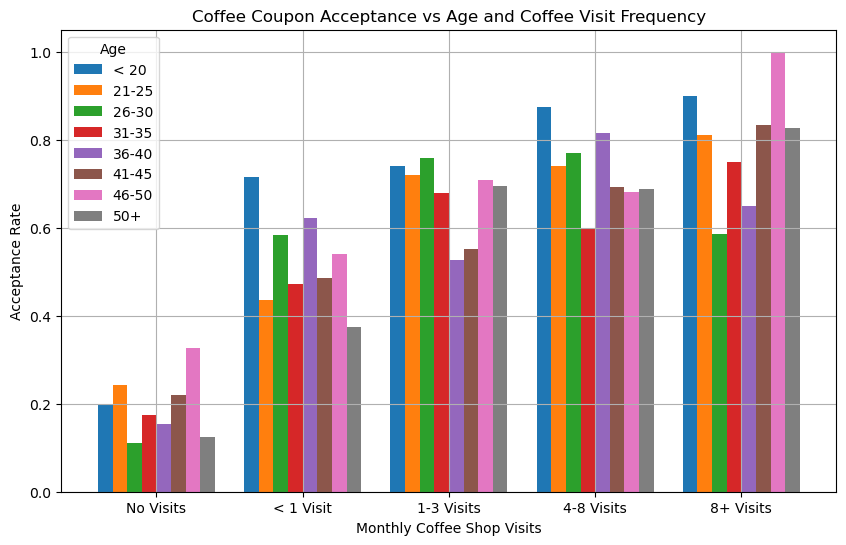

In [21]:
# Get the coupon visit counts
visit_counts = coffee_dataframe.groupby(['CoffeeHouse','age'])['Y'].mean()

# Reset index to flatten the multi-index
visit_counts = visit_counts.reset_index()

# Reorder columns
custom_order = ['never','less1','1~3','4~8','gt8']

# Pivot table
visit_counts = visit_counts.pivot(index='CoffeeHouse', columns='age', values='Y')

# Reorder index
visit_counts = visit_counts.reindex(index=custom_order)

ax = visit_counts.plot(
    kind='bar',
    figsize=(10, 6),
    title='Coffee Coupon Acceptance vs Age and Coffee Visit Frequency',
    xlabel='Monthly Coffee Shop Visits',
    ylabel='Acceptance Rate',
    grid=True,
    width=0.8,
    stacked=False
)

# Rename x-axis labels
new_labels = ['No Visits', '< 1 Visit', '1-3 Visits', '4-8 Visits', '8+ Visits']  
plt.xticks(ticks=range(len(custom_order)), labels=new_labels, rotation=0)

legend_labels = ['< 20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50','50+']  
ax.legend(legend_labels, title='Age')  # Apply custom legend labels with a title

plt.xlabel('Monthly Coffee Shop Visits')  # New x-axis label

plt.show()

## Show a Visual Comparision of Coffee Coupon Acceptance, by Visits and Age 
#
## As seen here.  Age < 20 have comparatively higher Coffee Coupon Acceptance and Frequency of Visits

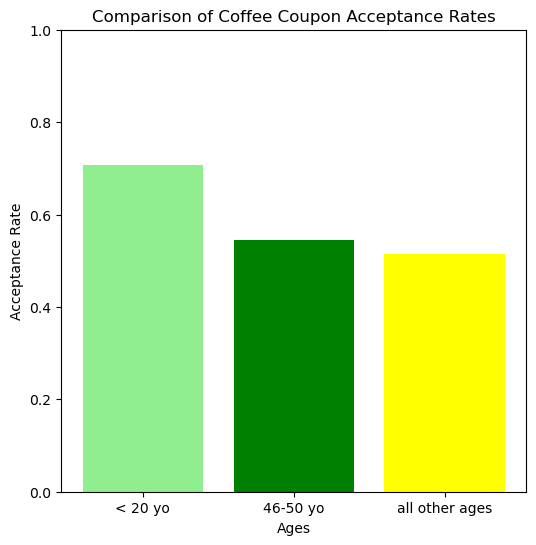

In [22]:
# Group 1: Drivers who are 20 yo and under
coffee_dataframe_under21 = coffee_dataframe[(coffee_dataframe['age'] == 20)]

# Group 2: Drivers who are 46-50 yo
coffee_dataframe_46_50 = coffee_dataframe[(coffee_dataframe['age'] == 46)]

# Group 3: Drivers who are not 20 yo and under, and not 46-50 yo
coffee_dataframe_all_others = coffee_dataframe[((coffee_dataframe['age'] != 20) & (coffee_dataframe['age'] != 46))]

# Calculate acceptance rates
acceptance_rate_group1 = coffee_dataframe_under21['Y'].mean()  # Mean of the Accepted column
acceptance_rate_group2 = coffee_dataframe_46_50['Y'].mean()
acceptance_rate_group3 = coffee_dataframe_all_others['Y'].mean()

# Create a DataFrame for the bar chart
comparison_df = pd.DataFrame({
    'Group': ['< 20 yo', '46-50 yo', 'all other ages'],
    'Acceptance Rate': [acceptance_rate_group1, acceptance_rate_group2, acceptance_rate_group3]
})

# Plot the bar chart
plt.figure(figsize=(6, 6))
plt.bar(comparison_df['Group'], comparison_df['Acceptance Rate'], color=['lightgreen','green','yellow'])
plt.title('Comparison of Coffee Coupon Acceptance Rates')
plt.xlabel('Ages')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)  # Acceptance rate is between 0 and 1
plt.xticks(rotation=0)
plt.show()

## As seen here:
## Under 21 have the highest Coffee Coupon rates

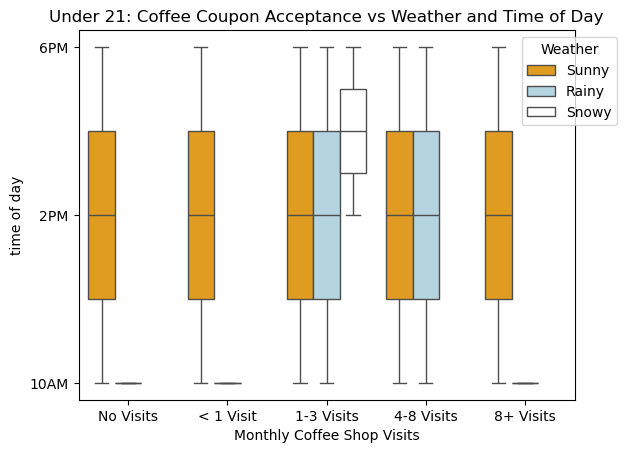

In [23]:
# data frame for under 21 yo
coffee_dataframe_under21 = coffee_dataframe[(coffee_dataframe['age'] == 20)]

coffee_dataframe_under21 = coffee_dataframe_under21.groupby(['time', 'CoffeeHouse','weather'])['Y'].mean()
coffee_dataframe_under21 = coffee_dataframe_under21.reset_index()

plt.title('Under 21: Coffee Coupon Acceptance vs Weather and Time of Day')
color_palette = ['orange', 'lightblue', 'white']
custom_order = ['never','less1','1~3','4~8','gt8']
hue_order = ['Sunny', 'Rainy', 'Snowy'] 
ax = sns.boxplot(data=coffee_dataframe_under21,x='CoffeeHouse',y='time',order=custom_order, meanline=True, palette=color_palette, hue_order=hue_order, hue='weather')

ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1), title='Weather')

new_labels = ['No Visits', '< 1 Visit', '1-3 Visits', '4-8 Visits', '8+ Visits']  # New names
plt.xticks(ticks=range(len(custom_order)), labels=new_labels, rotation=0)

plt.xlabel('Monthly Coffee Shop Visits')  # New x-axis label
plt.ylabel('time of day')

ax.invert_yaxis()

plt.show()

## Drill down to see the under 21 Coupon Acceptance based on weather, #visits and time of day


## Coffee Coupon Acceptance Conclusion

### Key Findings:
1. **Overall Coupon Acceptance**:
   - Coffee coupon acceptance is at least **~30% more likely** if the customer is **under 21 years old**.

2. **Influence of Weather on Acceptance for Under 21s**:
   - **Sunny Weather**: 
     - Under 21s **always accepted** the coupon during sunny weather.
   - **Rainy Weather**: 
     - Only those with **1-8 visits** for the month accepted the coupon.
   - **Snowy Weather**: 
     - Acceptance was limited to those with **1-3 visits** for the month.
     - Coupons were only accepted during the **2-6 PM time window**.

### Conclusion:
Under-21 customers are at least 30% more likely to accept coffee coupons compared to older groups. Weather conditions also significantly affect acceptance rates among younger customers, with distinct patterns influenced by weather type and visit frequency. These insights can help businesses optimize their coupon distribution strategies.

### Actionable insights

- **Bar Coupons:** Sending coupons to those with at least one bar visit a month and without a child passenger.  Has a 60%+ more effective response rate.  

- **Coffee Coupons**: Under 21 year olds, is a signficant demographic to target for coffee coupons.  And in snowy weather, focusing on the under 21's who have only visited 1-3 times for the month, has a positive return.
